Data Exploration

In [ ]:
import pandas as pd

category=pd.read_csv('/content/Category_Data.csv')
department=pd.read_csv('/content/Department_Data.csv')
store=pd.read_csv('/content/Store_Data.csv')
general=pd.read_csv('/content/General Sales Data.csv')

In [ ]:
department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Department ID    62 non-null     object
 1   Department Name  61 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [ ]:
store.head()

Store ID Store Name    Location
0         8     קייזר8  North East
1         9     קייזר9     Central
2        10    קייזר10        West
3       168   קייזר168       South
4       228   קייזר228  North East

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Store ID    60 non-null     int64 
 1   Store Name  60 non-null     object
 2   Location    60 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [ ]:
general.head()

Department ID  Category ID  Store ID  Sale Quantity  \
0            893          260       256              2   
1            922          261       256             88   
2              9            7       256             10   
3              9            8       256              3   
4              9           10       256              3   

   Gross Value for single Product (Single Sale)  Retail Value (Single Sale)  \
0                                          9.32                   10.904000   
1                                         15.96                   18.672727   
2                                          8.03                    9.395700   
3                                          6.81                    7.968000   
4                                         13.88                   16.237667   

   Tax with Revenue  Cost  Tax per unit  TotalQTY   TotalSales  \
0                 0     0          1.58          2      18.632   
1                 0     0          2.71         88    1404.450   
2                 0     0          1.37         10      80.343   
3                 0     0          1.16          3      20.426   
4                 0     0          2.36          3      41.627   

         SalesDate Sales Time  Buying price per product  
0  3/16/2023 23:59   18:14:01                      6.52  
1  3/16/2023 23:59   11:03:45                     12.93  
2  3/16/2023 23:59   19:22:52                      6.35  
3  3/16/2023 23:59    8:26:30                      5.17  
4  3/16/2023 23:59   10:35:50                     10.69

In [ ]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372539 entries, 0 to 372538
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Department ID                                 372539 non-null  int64  
 1   Category ID                                   372539 non-null  int64  
 2   Store ID                                      372539 non-null  int64  
 3   Sale Quantity                                 372539 non-null  int64  
 4   Gross Value for single Product (Single Sale)  372539 non-null  float64
 5   Retail Value (Single Sale)                    372539 non-null  float64
 6   Tax with Revenue                              372539 non-null  int64  
 7   Cost                                          372539 non-null  int64  
 8   Tax per unit                                  372539 non-null  float64
 9   TotalQTY                                      37

In [ ]:
category.tail()

Category ID              Category Name
217          353  מסירי אבנית למכונת הכביסה
218          355            ניקוי כלים ידני
219         1222        דגים אמנון קפוא ח 1
220         1223        דגים סלמון קפוא ח.1
221         1225       דגים מרלוזה קפוא ח.1

In [ ]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category ID    222 non-null    int64 
 1   Category Name  222 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [ ]:
# check for encoding

import chardet

with open('Category_Data.csv', 'rb') as file:

        rawdata = file.read(1024)

        result = chardet.detect(rawdata)
        encoding = result['encoding']
        confidence = result['confidence']

        print(f"The detected encoding is {encoding} with confidence {confidence * 100}%.")


The detected encoding is utf-8 with confidence 99.0%.


In [ ]:
# merge date and time columns

general['SalesDate']=pd.to_datetime(general['SalesDate'])
general['Sales Time']=pd.to_datetime(general['Sales Time'], format='%H:%M:%S').dt.time

general['SalesDateTime'] = pd.to_datetime(general['SalesDate'].astype(str) + ' ' + general['Sales Time'].astype(str))

general = general.sort_values(by='SalesDateTime')

general.head()

Department ID  Category ID  Store ID  Sale Quantity  \
195280            919          207       274              1   
192864            935          334       257             55   
199939              9           11       252             33   
197959            860           79       237             18   
194316            892          107       266              2   

        Gross Value for single Product (Single Sale)  \
195280                                          0.00   
192864                                         16.42   
199939                                          9.02   
197959                                         17.50   
194316                                         16.16   

        Retail Value (Single Sale)  Tax with Revenue  Cost  Tax per unit  \
195280                    0.000000                 0     0          0.00   
192864                   16.420000                 0     0          0.00   
199939                   10.555576                 0     0          1.54   
197959                   20.475000                 0     0          2.98   
194316                   18.905000                 0     0          2.75   

        TotalQTY   TotalSales           SalesDate Sales Time  \
195280          0       0.000 2023-02-13 23:59:00   08:00:09   
192864         55     903.200 2023-02-13 23:59:00   08:00:12   
199939         33     297.726 2023-02-13 23:59:00   08:00:18   
197959         18     315.050 2023-02-13 23:59:00   08:00:29   
194316          2      32.310 2023-02-13 23:59:00   08:00:30   

        Buying price per product       SalesDateTime  
195280                      0.00 2023-02-13 08:00:09  
192864                     14.12 2023-02-13 08:00:12  
199939                      7.13 2023-02-13 08:00:18  
197959                     11.90 2023-02-13 08:00:29  
194316                     12.76 2023-02-13 08:00:30

In [ ]:
# check whether totalQTY and Sale Quantity are the same

diff=general['TotalQTY ']-general['Sale Quantity']
print(diff.unique())

[-1  0]


In [ ]:
# drop unnecessary columns


columns=general.columns
print(columns)

general.drop(columns=['Tax with Revenue', 'Cost', 'Buying price per product', 'TotalQTY '])

Index(['Department ID', 'Category ID', 'Store ID', 'Sale Quantity',
       'Gross Value for single Product (Single Sale)',
       'Retail Value (Single Sale)', 'Tax with Revenue', 'Cost',
       'Tax per unit', 'TotalQTY ', 'TotalSales', 'SalesDate', 'Sales Time',
       'Buying price per product', 'SalesDateTime'],
      dtype='object')


Department ID  Category ID  Store ID  Sale Quantity  \
195280            919          207       274              1   
192864            935          334       257             55   
199939              9           11       252             33   
197959            860           79       237             18   
194316            892          107       266              2   
...               ...          ...       ...            ...   
187828            894          111       279             92   
185855            883           97         9              3   
186375            932          318       267              1   
188815            864          317       289              7   
192283            864           50       252            287   

        Gross Value for single Product (Single Sale)  \
195280                                          0.00   
192864                                         16.42   
199939                                          9.02   
197959                                         17.50   
194316                                         16.16   
...                                              ...   
187828                                          4.34   
185855                                         11.88   
186375                                         42.65   
188815                                          7.37   
192283                                          5.36   

        Retail Value (Single Sale)  Tax per unit  TotalSales  \
195280                    0.000000          0.00      0.0000   
192864                   16.420000          0.00    903.2000   
199939                   10.555576          1.54    297.7260   
197959                   20.475000          2.98    315.0500   
194316                   18.905000          2.75     32.3100   
...                            ...           ...         ...   
187828                    5.078641          0.74    399.6350   
185855                   13.900000          2.02     35.6400   
186375                   49.900000          7.25     42.6500   
188815                    7.370000          0.00     51.6000   
192283                    6.272416          0.91   1539.4365   

                 SalesDate Sales Time       SalesDateTime  
195280 2023-02-13 23:59:00   08:00:09 2023-02-13 08:00:09  
192864 2023-02-13 23:59:00   08:00:12 2023-02-13 08:00:12  
199939 2023-02-13 23:59:00   08:00:18 2023-02-13 08:00:18  
197959 2023-02-13 23:59:00   08:00:29 2023-02-13 08:00:29  
194316 2023-02-13 23:59:00   08:00:30 2023-02-13 08:00:30  
...                    ...        ...                 ...  
187828 2023-04-19 23:59:00   21:59:38 2023-04-19 21:59:38  
185855 2023-04-19 23:59:00   21:59:45 2023-04-19 21:59:45  
186375 2023-04-19 23:59:00   21:59:49 2023-04-19 21:59:49  
188815 2023-04-19 23:59:00   21:59:56 2023-04-19 21:59:56  
192283 2023-04-19 23:59:00   21:59:59 2023-04-19 21:59:59  

[372539 rows x 11 columns]

In [ ]:
general['Store ID'].unique()

array([274, 257, 252, 237, 266, 285, 277, 286, 246, 258, 275, 261, 276,
       238, 234, 269, 253, 271, 263, 235, 241, 243, 284, 264, 254, 168,
       228, 233, 260, 245, 256,   9, 242, 268, 247, 270, 249, 250, 239,
       240, 288, 244, 259, 292, 281, 290, 251, 272,  10, 289, 265, 267,
       248, 279,   8, 236, 283, 282, 273, 291])

In [ ]:
general['Department ID'].unique()

array([919, 935,   9, 860, 892, 864, 861, 905, 870, 865, 891, 910, 879,
       930, 897, 887, 912, 881, 916, 907, 895, 863, 894, 884, 906, 918,
       868, 921, 883, 888, 867, 911, 931, 899, 869, 932, 893, 882, 885,
       886, 866, 908, 859, 939, 904, 927, 922, 873, 923, 880, 917, 874,
       889, 936, 875, 901, 902, 898, 862, 903, 872])

In [ ]:
# one hot encode categorical data

cat_data=['Store ID', 'Department ID']

general_encoded=pd.get_dummies(general, columns=cat_data)

In [ ]:
y=general['TotalSales']

X_seq=general_encoded.loc[:,['SalesDateTime']]
X_extra=general_encoded.drop(columns=['SalesDateTime', 'TotalSales'])

In [ ]:
X_extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372539 entries, 195280 to 192283
Columns: 132 entries, Category ID to Department ID_939
dtypes: datetime64[ns](1), float64(4), int64(5), object(1), uint8(121)
memory usage: 77.1+ MB


In [ ]:
# removing redundant columns from external predictors

X_extra.drop(columns=['SalesDate', 'Sales Time'])

Category ID  Sale Quantity  \
195280          207              1   
192864          334             55   
199939           11             33   
197959           79             18   
194316          107              2   
...             ...            ...   
187828          111             92   
185855           97              3   
186375          318              1   
188815          317              7   
192283           50            287   

        Gross Value for single Product (Single Sale)  \
195280                                          0.00   
192864                                         16.42   
199939                                          9.02   
197959                                         17.50   
194316                                         16.16   
...                                              ...   
187828                                          4.34   
185855                                         11.88   
186375                                         42.65   
188815                                          7.37   
192283                                          5.36   

        Retail Value (Single Sale)  Tax with Revenue  Cost  Tax per unit  \
195280                    0.000000                 0     0          0.00   
192864                   16.420000                 0     0          0.00   
199939                   10.555576                 0     0          1.54   
197959                   20.475000                 0     0          2.98   
194316                   18.905000                 0     0          2.75   
...                            ...               ...   ...           ...   
187828                    5.078641                 0     0          0.74   
185855                   13.900000                 0     0          2.02   
186375                   49.900000                 0     0          7.25   
188815                    7.370000                 0     0          0.00   
192283                    6.272416                 0     0          0.91   

        TotalQTY   Buying price per product  Store ID_8  ...  \
195280          0                      0.00           0  ...   
192864         55                     14.12           0  ...   
199939         33                      7.13           0  ...   
197959         18                     11.90           0  ...   
194316          2                     12.76           0  ...   
...           ...                       ...         ...  ...   
187828         92                      3.34           0  ...   
185855          3                      9.15           0  ...   
186375          1                     31.14           0  ...   
188815          7                      6.63           0  ...   
192283        287                      4.02           0  ...   

        Department ID_921  Department ID_922  Department ID_923  \
195280                  0                  0                  0   
192864                  0                  0                  0   
199939                  0                  0                  0   
197959                  0                  0                  0   
194316                  0                  0                  0   
...                   ...                ...                ...   
187828                  0                  0                  0   
185855                  0                  0                  0   
186375                  0                  0                  0   
188815                  0                  0                  0   
192283                  0                  0                  0   

        Department ID_927  Department ID_930  Department ID_931  \
195280                  0                  0                  0   
192864                  0                  0                  0   
199939                  0                  0                  0   
197959                  0                  0                  0   
194316                  0                  0            

In [ ]:
general_encoded['Department ID_921'].dtype

dtype('uint8')

In [ ]:
# standarize numerical columns


from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

features=X_extra.columns

for i in features:
  if X_extra[i].dtype=='float64' or X_extra[i].dtype=='int64':
    vals=X_extra[i].values.reshape(-1, 1)
    scaled = scaler.fit_transform(vals)
    X_extra[i] = scaled.flatten()

In [ ]:
X_extra.head()

Category ID  Sale Quantity  \
195280     0.140231      -0.344828   
192864     1.354599       0.269886   
199939    -1.733911       0.019447   
197959    -1.083698      -0.151307   
194316    -0.815963      -0.333445   

        Gross Value for single Product (Single Sale)  \
195280                                     -0.982116   
192864                                      0.119072   
199939                                     -0.377200   
197959                                      0.191500   
194316                                      0.101635   

        Retail Value (Single Sale)  Tax with Revenue  Cost  Tax per unit  \
195280                   -0.998973               0.0   0.0     -0.981359   
192864                   -0.031316               0.0   0.0     -0.981359   
199939                   -0.376916               0.0   0.0     -0.326308   
197959                    0.207652               0.0   0.0      0.286206   
194316                    0.115129               0.0   0.0      0.188374   

        TotalQTY            SalesDate Sales Time  ...  Department ID_921  \
195280  -0.356027 2023-02-13 23:59:00   08:00:09  ...                  0   
192864   0.270035 2023-02-13 23:59:00   08:00:12  ...                  0   
199939   0.019610 2023-02-13 23:59:00   08:00:18  ...                  0   
197959  -0.151134 2023-02-13 23:59:00   08:00:29  ...                  0   
194316  -0.333261 2023-02-13 23:59:00   08:00:30  ...                  0   

        Department ID_922  Department ID_923  Department ID_927  \
195280                  0                  0                  0   
192864                  0                  0                  0   
199939                  0                  0                  0   
197959                  0                  0                  0   
194316                  0                  0                  0   

        Department ID_930  Department ID_931  Department ID_932  \
195280                  0                  0                  0   
192864                  0                  0                  0   
199939                  0                  0                  0   
197959                  0                  0                  0   
194316                  0                  0                  0   

        Department ID_935  Department ID_936  Department ID_939  
195280                  0                  0                  0  
192864                  1                  0                  0  
199939                  0                  0                  0  
197959                  0                  0                  0  
194316                  0                  0                  0  

[5 rows x 132 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Combine sequential and static features
X_seq = general[['SalesDateTime']].values
X_static = general[['Department ID', 'Category ID', 'Store ID', 'Gross Value for single Product (Single Sale)',
                    'Retail Value (Single Sale)', 'TotalQTY ', 'Tax per unit']].values
Y = general['TotalSales'].values

# Split the data into training and testing sets
X_seq_train, X_seq_test, X_static_train, X_static_test, Y_train, Y_test = train_test_split(
    X_seq, X_static, Y, test_size=0.2, random_state=42
)


In [ ]:
print(general.columns)


Index(['Department ID', 'Category ID', 'Store ID', 'Sale Quantity',
       'Gross Value for single Product (Single Sale)',
       'Retail Value (Single Sale)', 'Tax with Revenue', 'Cost',
       'Tax per unit', 'TotalQTY ', 'TotalSales', 'SalesDate', 'Sales Time',
       'Buying price per product', 'SalesDateTime'],
      dtype='object')


In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, concatenate
from keras.callbacks import EarlyStopping
import numpy as np

# Convert datetime to timestamp
X_seq_train_timestamps = X_seq_train.astype(np.int64) // 10**9
X_seq_test_timestamps = X_seq_test.astype(np.int64) // 10**9

# Reshape sequential input data
X_seq_train_reshaped = np.expand_dims(X_seq_train_timestamps, axis=-1)
X_seq_test_reshaped = np.expand_dims(X_seq_test_timestamps, axis=-1)

seq_input = Input(shape=(X_seq_train_reshaped.shape[1], X_seq_train_reshaped.shape[2]), name='seq_input')

static_input = Input(shape=(X_static_train.shape[1],), name='static_input')

lstm_layer = LSTM(64)(seq_input)

merged = concatenate([lstm_layer, static_input])

output_layer = Dense(1, activation='linear', name='output_layer')(merged)

model = Model(inputs=[seq_input, static_input], outputs=output_layer)


model.compile(optimizer='adam', loss='mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(
    [X_seq_train_reshaped, X_static_train],
    Y_train,
    epochs=15,
    batch_size=32,
    validation_data=([X_seq_test_reshaped, X_static_test], Y_test),
    callbacks=[early_stopping]
)

# Make predictions 
predictions = model.predict([X_seq_test_reshaped, X_static_test])


Epoch 1/15
9314/9314 [==============================] - 40s 4ms/step - loss: 394607.3125 - val_loss: 245809.1406
Epoch 2/15
9314/9314 [==============================] - 37s 4ms/step - loss: 194572.4844 - val_loss: 134314.8750
Epoch 3/15
9314/9314 [==============================] - 36s 4ms/step - loss: 130233.7422 - val_loss: 110520.7188
Epoch 4/15
9314/9314 [==============================] - 36s 4ms/step - loss: 120751.3359 - val_loss: 108940.3984
Epoch 5/15
9314/9314 [==============================] - 37s 4ms/step - loss: 120056.9141 - val_loss: 108850.3594
Epoch 6/15
9314/9314 [==============================] - 42s 5ms/step - loss: 119995.8516 - val_loss: 108902.7422
Epoch 7/15
9314/9314 [==============================] - 36s 4ms/step - loss: 119953.4219 - val_loss: 108938.7500
Epoch 8/15
9314/9314 [==============================] - 35s 4ms/step - loss: 119954.3438 - val_loss: 108851.6797
Epoch 9/15
9314/9314 [==============================] - 37s 4ms/step - loss: 119914.8281 - val_l

In [ ]:

predictions = model.predict([X_seq_test_reshaped, X_static_test])

# Display the first 10 predictions
print("First 10 predictions:")
print(predictions[:10])


2329/2329 [==============================] - 5s 2ms/step
First 10 predictions:
[[ 60.258007]
 [ 64.183044]
 [288.98322 ]
 [225.06308 ]
 [ 92.473335]
 [ 65.25595 ]
 [138.01863 ]
 [ 58.449028]
 [182.59396 ]
 [ 96.860245]]


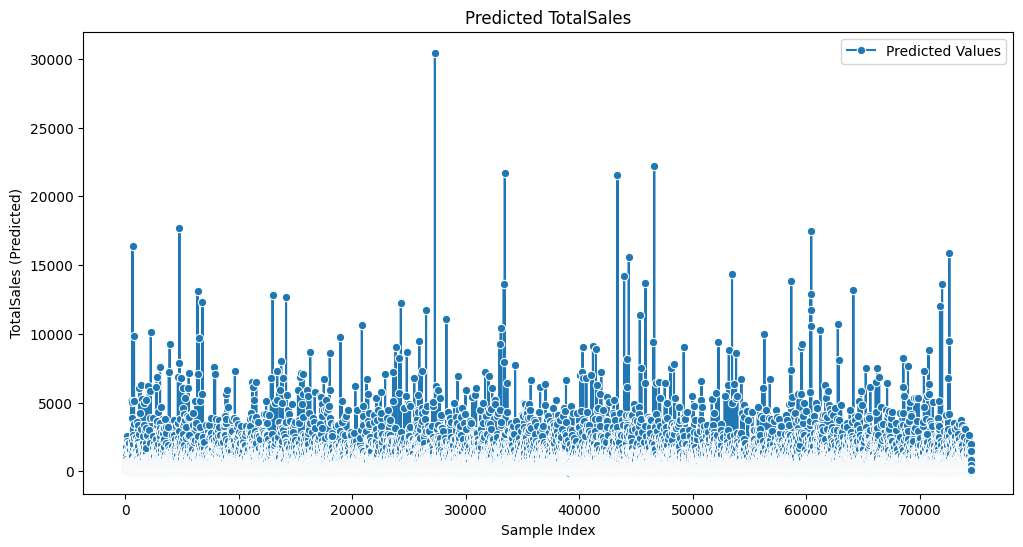

In [ ]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(predictions)), y=predictions.flatten(), label='Predicted Values', marker='o')


plt.xlabel('Sample Index')
plt.ylabel('TotalSales (Predicted)')
plt.title('Predicted TotalSales')


plt.legend()
plt.show()


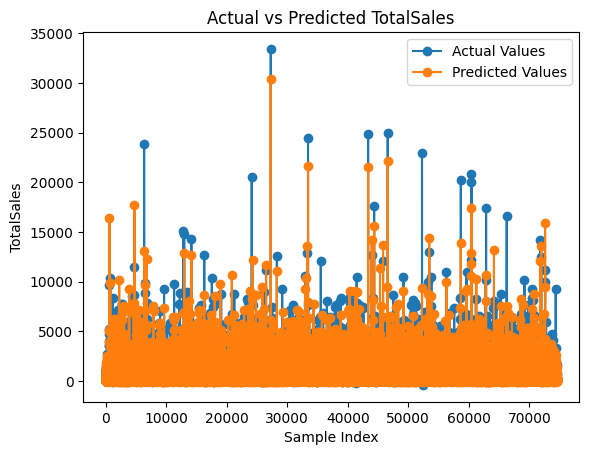

In [ ]:
import matplotlib.pyplot as plt


actual_values = Y_test


plt.plot(actual_values, label='Actual Values', marker='o')

plt.plot(predictions, label='Predicted Values', marker='o')


plt.xlabel('Sample Index')
plt.ylabel('TotalSales')
plt.title('Actual vs Predicted TotalSales')
plt.legend()


plt.show()


In [ ]:
max(general['TotalSales'].values)


33435.989

In [ ]:
min(general['TotalSales'].values)

-5940.23

In [ ]:
import pandas as pd

general=pd.read_csv('/content/General Sales Data1.csv')

general.head()

Department ID  Category ID  Store ID  Sale Quantity  \
0            893          260       256              2   
1            922          261       256             88   
2              9            7       256             10   
3              9            8       256              3   
4              9           10       256              3   

   Gross Value for single Product (Single Sale)  Retail Value (Single Sale)  \
0                                          9.32                   10.904000   
1                                         15.96                   18.672727   
2                                          8.03                    9.395700   
3                                          6.81                    7.968000   
4                                         13.88                   16.237667   

   Tax with Revenue  Cost  Tax per unit  TotalQTY   TotalSales  \
0                 0     0          1.58          2      18.632   
1                 0     0          2.71         88    1404.450   
2                 0     0          1.37         10      80.343   
3                 0     0          1.16          3      20.426   
4                 0     0          2.36          3      41.627   

         SalesDate Sales Time  Buying price per product  
0  3/16/2023 23:59   18:14:01                      6.52  
1  3/16/2023 23:59   11:03:45                     12.93  
2  3/16/2023 23:59   19:22:52                      6.35  
3  3/16/2023 23:59    8:26:30                      5.17  
4  3/16/2023 23:59   10:35:50                     10.69

Creating Visualization for presentation

In [ ]:
import pandas as pd
import plotly.express as px


general['SalesDate'] = pd.to_datetime(general['SalesDate'])


general['FormattedDate'] = general['SalesDate'].dt.strftime('%Y-%m-%d')

fig = px.line(general, x='FormattedDate', y='TotalSales', title='Sales vs. Day')

fig.show()


In [ ]:
category=pd.read_csv('Category_Data.csv')

category.head()

Category ID        Category Name
0            7       שימורי עגבניות
1            8         שימורי פירות
2            9  שימורי אירוח וקינוח
3           10         שימורי ירקות
4           11                זיתים

In [ ]:
merged = pd.merge(general, category, how='left', on='Category ID')

sum_sales_per_category = merged.groupby('Category Name')['TotalSales'].sum().reset_index()

In [ ]:
fig = px.bar(sum_sales_per_category, x='Category Name', y='TotalSales', title='Total Sales per Category')

fig.show()

In [ ]:
store=pd.read_csv('Store_Data.csv')

store.head()

print(store['Store ID'].unique())

[  8   9  10 168 228 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 256 257 258 259 260 261 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 279 281 282 283 284 285
 286 288 289 290 291 292]


In [ ]:
merged_store=pd.merge(general, store, how='left', on='Store ID')

merged_store.head()

Department ID  Category ID  Store ID  Sale Quantity  \
0            893          260       256              2   
1            922          261       256             88   
2              9            7       256             10   
3              9            8       256              3   
4              9           10       256              3   

   Gross Value for single Product (Single Sale)  Retail Value (Single Sale)  \
0                                          9.32                   10.904000   
1                                         15.96                   18.672727   
2                                          8.03                    9.395700   
3                                          6.81                    7.968000   
4                                         13.88                   16.237667   

   Tax with Revenue  Cost  Tax per unit  TotalQTY   TotalSales  \
0                 0     0          1.58          2      18.632   
1                 0     0          2.71         88    1404.450   
2                 0     0          1.37         10      80.343   
3                 0     0          1.16          3      20.426   
4                 0     0          2.36          3      41.627   

         SalesDate Sales Time  Buying price per product Store Name   Location  
0  3/16/2023 23:59   18:14:01                      6.52   קייזר256  southwest  
1  3/16/2023 23:59   11:03:45                     12.93   קייזר256  southwest  
2  3/16/2023 23:59   19:22:52                      6.35   קייזר256  southwest  
3  3/16/2023 23:59    8:26:30                      5.17   קייזר256  southwest  
4  3/16/2023 23:59   10:35:50                     10.69   קייזר256  southwest

In [ ]:
sum_sales_per_store = merged_store.groupby('Store Name')['TotalSales'].sum().reset_index()


In [ ]:
fig_store = px.bar(sum_sales_per_store, x='Store Name', y='TotalSales', title='Total Sales per Store')
fig_store.show()
